## Figures for BglB thermal stability paper, and summary statistics and those that don't fit anywhere else 

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt 
import pandas
import numpy as np 
from numpy import log10, log2, inf, nan, arange, linspace 

In [10]:
df = pandas.read_csv( '../data_set/targets.csv', index_col=0 )

In [11]:
df.describe()

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
count,128.000000,129.000000,79.000000,79.000000,79.000000,79.000000,76.000000,76.000000,76.000000,76.000000,...,8.000000,8.000000,8.000000,128.000000,129.000000,79.000000,76.000000,76.000000,79.000000,128.000000
mean,241.531250,0.713178,39.463291,-0.838354,0.268734,0.156456,539.436842,13.068553,11.117895,1.000526,...,227.772500,35.595000,111.186250,10.390625,0.713178,-0.466709,-0.748108,-0.172267,-1.060987,0.499220
std,122.181737,0.454041,1.645206,0.374917,0.156683,0.156140,1263.384644,31.362360,13.437381,1.186895,...,167.270111,22.658287,165.916493,5.749679,0.454041,1.645206,0.907249,0.390723,1.241569,0.355953
min,12.000000,0.000000,34.910000,-1.730000,0.040000,0.020000,0.200000,0.010000,0.400000,0.020000,...,95.240000,13.700000,13.050000,1.000000,0.000000,-5.020000,-3.643453,-1.251297,-4.199157,0.001263
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
max,423.000000,1.000000,45.990000,-0.260000,0.790000,0.860000,11011.000000,258.000000,89.180000,5.890000,...,590.710000,86.560000,511.320000,21.000000,1.000000,6.060000,1.097344,1.096910,0.955350,1.000000


In [12]:
df.sample( 3 )

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
I300N,300.0,1,38.56,-0.42,0.54,0.08,693.0,13.0,4.48,0.32,...,NaN,NaN,NaN,7.0,1,-1.37,-0.103749,0.047692,-0.050969,0.128006
W325C,325.0,1,39.30,-1.03,0.15,0.14,10.0,1.0,4.18,0.53,...,159.19,34.38,54.73,12.0,1,-0.63,-1.944483,0.077794,-1.842088,0.856407
Q19A,19.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,1,NaN,NaN,NaN,NaN,0.990285


### Number of positions mutated, PyMOL selection, list of not expressed

Number of sequence positions mutated:

In [13]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [14]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print( 'select all_mutants, resi', s )

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [15]:
df[( df.expression == 0 )].index

Index(['G12N', 'S16N', 'Q19P', 'S32L', 'W34A', 'R76A', 'H119E', 'W120A',
       'D121F', 'N163E', 'N163K', 'E164G', 'E164R', 'Y166P', 'H178R', 'A236E',
       'R240E', 'A249E', 'M261D', 'N293D', 'N293K', 'Y294L', 'T296A', 'T296E',
       'H315N', 'M323K', 'W325G', 'P329N', 'F343S', 'G355A', 'H379T', 'D403A',
       'W407G', 'W407K', 'W407Q', 'W407R', 'W407Y'],
      dtype='object', name='mutant')

### How many with a T$_m$ within 1 degree of WT?

In [16]:
within = lower = higher = 0
for tm in df.tm:
    if abs( 39.9 - tm ) < 1:
        within += 1 
    elif tm > ( 39.9 + 1 ):
        higher += 1
    elif tm > 0 and tm < 38.9:
        lower += 1
        
print( within, lower, higher ) 

43 26 10


In [10]:
# to and from G mutants, and whether expressed 
for nm in df.index:
    if nm[0] == 'G' or nm[-1] == 'G':
        print( nm, df.loc[ nm ].expression ) 

G12N 0.0
V52G 1.0
E164G 0.0
N220G 1.0
Y295G 1.0
W325G 0.0
G355A 0.0
W399G 1.0
W407G 0.0


# Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [11]:
dat = pandas.read_csv( 'old_stuff/alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print( len( dat ) )

aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

print( len( clean_dat ) )
clean_dat.sample( 5 ) 

445
445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
d,78,0,957,86,0,11,6,1,75,17,...,36,30,29,32,2,0,1,0.604930,104,NaN
d,82,0,138,400,0,37,18,2,296,5,...,107,184,69,118,2,24,8,0.087121,150,NaN
k,109,15,267,285,6,73,87,8,145,3,...,49,170,68,53,24,1,107,0.095269,256,NaN
h,593,164,8,1,41,41,47,40,1,11,...,5,4,255,139,152,1,24,0.029785,74,NaN
p,24,1,0,0,6,0,0,26,0,24,...,0,0,8,13,46,0,0,0.905934,113,NaN


In [12]:
# sorry, the above is a terrible hack

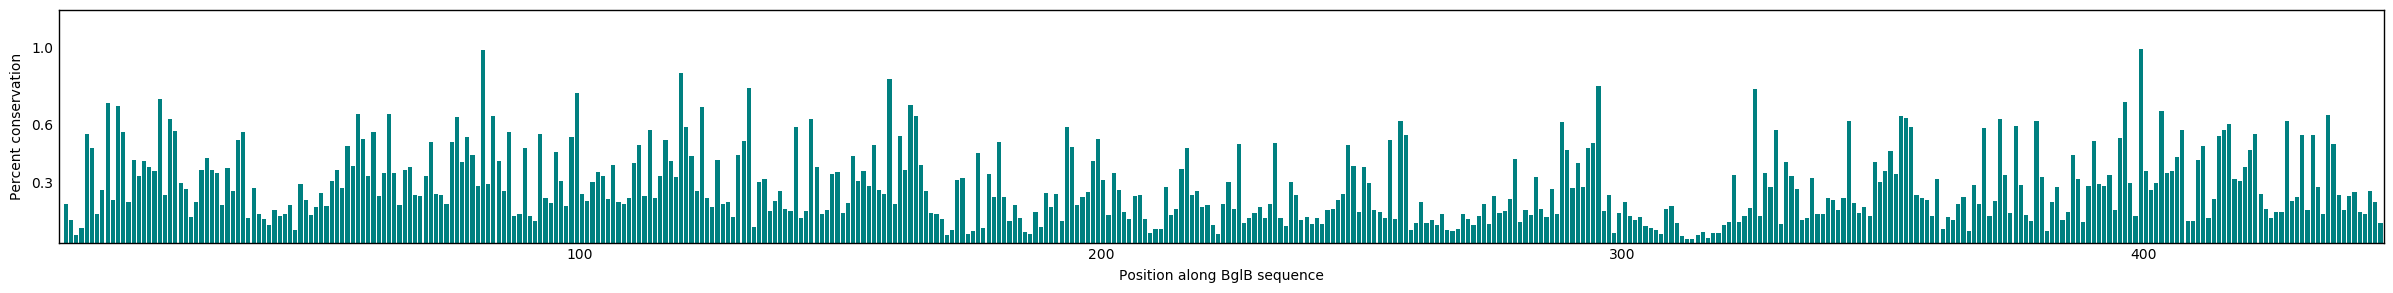

In [13]:
plt.figure( figsize=( 30, 3 ) ) 
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color='teal', label='Entropy' )

plt.xlim( 0, 446 ); plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position along BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [ 0.3, .6, 1 ] ) 
#plt.box(0)
plt.show()